In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [2]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [3]:
customer_data = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum',
}).reset_index()

customer_data.columns = ['CustomerID', 'TransactionCount', 'TotalSpending', 'TotalQuantity']


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TransactionCount', 'TotalSpending', 'TotalQuantity']])


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\91939\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.8650620583623065


In [7]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.3735646055654104


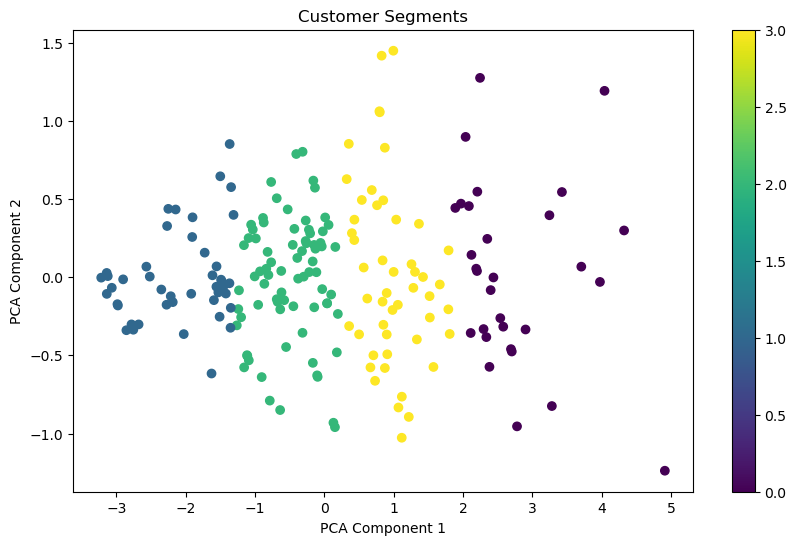

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [9]:
cluster_summary = customer_data.groupby('Cluster').agg({
    'TransactionCount': 'mean',
    'TotalSpending': 'mean',
    'TotalQuantity': 'mean',
}).reset_index()

print(cluster_summary)


   Cluster  TransactionCount  TotalSpending  TotalQuantity
0        0          8.433333    6263.447333      23.000000
1        1          2.363636    1273.368182       5.272727
2        2          4.394737    2982.406711      10.868421
3        3          6.306122    4477.572041      16.102041
